# チーモン VS 馬鹿よ　どっちが人気なの!? 　曜日対決！！！

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

/Users/runa/anaconda/lib/python3.5/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


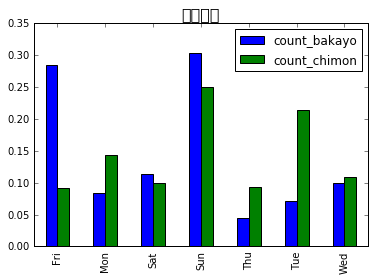

In [13]:
#正規化
df_norm_VS.plot.bar(y=['count_bakayo', 'count_chimon'])
plt.title(u'棒グラフ', size=16)

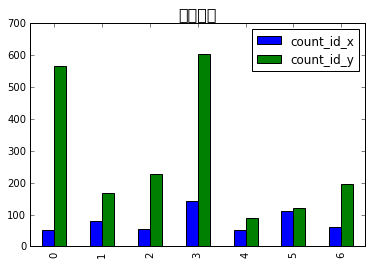

In [117]:
#単純
df_VS.plot.bar(y=['count_id_x', 'count_id_y'])
plt.title(u'棒グラフ', size=16)

### 馬鹿よ

In [1]:
import sqlite3
conn = sqlite3.connect('bakayo_VS_chimon.db')
c = conn.cursor()

In [2]:
query = '''
SELECT count(id), week FROM bakayo_time GROUP BY week
'''
count_id = c.execute(query)

#### 単純

In [185]:
import pandas as pd
df_bakayo = pd.DataFrame(columns=['count_id','week'])

In [200]:
for row in count_id:
    print(row)
    df_addition_row = pd.DataFrame([[row[0], row[1]]])
    df_addition_row.columns = ['count_id','week']
    df_bakayo = pd.concat([df_bakayo,df_addition_row],axis=0)

(566, 'Fri')
(167, 'Mon')
(226, 'Sat')
(603, 'Sun')
(89, 'Thu')
(121, 'Tue')
(197, 'Wed')


#### 正規化

In [294]:
#import pandas as pd
#df_bakayo = pd.DataFrame(columns=['count_id'], index=['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'])
#df_bakayo = pd.DataFrame(index=['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'])

In [3]:
import pandas as pd
df_bakayo = pd.DataFrame(columns=['count_bakayo'])

In [4]:
for row in count_id:
    #print(row[1])
    #df_addition_row = pd.DataFrame
    df_addition_row = pd.DataFrame([row[0]], index=[row[1]])
    #print(df_addition_row)
    df_addition_row.columns = ['count_bakayo']
    #df_addition_row.index = [row[1]]
    df_bakayo = pd.concat([df_bakayo,df_addition_row], axis=0)

Fri
       0
Fri  566
Mon
       0
Mon  167
Sat
       0
Sat  226
Sun
       0
Sun  603
Thu
      0
Thu  89
Tue
       0
Tue  141
Wed
       0
Wed  197


In [5]:
df_norm_bakayo = df_bakayo.div(df_bakayo.T.sum(1), axis=1)

### グラフ描写

In [12]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

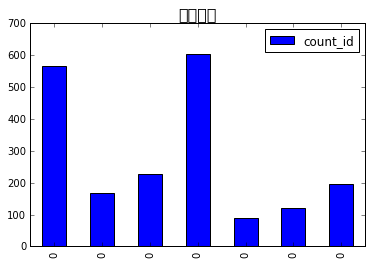

In [121]:
df_bakayo.plot.bar(y=['count_id'])
plt.title(u'棒グラフ', size=16)

### チーモン

In [23]:
import sqlite3
conn = sqlite3.connect('bakayo_VS_chimon.db')
c = conn.cursor()

In [6]:
query = '''
SELECT count(id), week FROM chimon_time GROUP BY week
'''
count_id = c.execute(query)

#### 単純

In [105]:
import pandas as pd
df_chimon = pd.DataFrame(columns=['count_id','week'])

In [106]:
for row in count_id:
    print(row)
    df_addition_row = pd.DataFrame([[row[0], row[1]]])
    df_addition_row.columns = ['count_id','week']
    df_chimon = pd.concat([df_chimon,df_addition_row],axis=0)

(52, 'Fri')
(81, 'Mon')
(56, 'Sat')
(142, 'Sun')
(53, 'Thu')
(110, 'Tue')
(62, 'Wed')


#### 正規化

In [7]:
import pandas as pd
df_chimon = pd.DataFrame(columns=['count_chimon'])

In [8]:
for row in count_id:
    #print(row[1])
    #df_addition_row = pd.DataFrame
    df_addition_row = pd.DataFrame([row[0]], index=[row[1]])
    #print(df_addition_row)
    df_addition_row.columns = ['count_chimon']
    #df_addition_row.index = [row[1]]
    df_chimon = pd.concat([df_chimon,df_addition_row], axis=0)

In [9]:
df_norm_chimon = df_chimon.div(df_chimon.T.sum(1), axis=1)

### グラフ描写

In [84]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

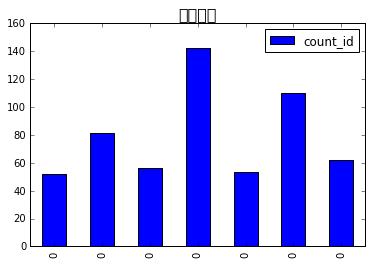

In [97]:
df_chimon.plot.bar(y=['count_id'])
plt.title(u'棒グラフ', size=16)

### 棒グラフで比較するためにDataFrameをMerge

In [332]:
#単純な方のマージ
df_VS = pd.merge(df_chimon, df_bakayo)

※折れ線グラフで表現するの諦めた。っていうか、折れ線グラフってx軸に質的変数取っていいんだっけ？

In [10]:
#正規化した方のマージ
df_norm_VS = df_norm_bakayo.join(df_norm_chimon)